In [1]:
import pandas as pd

In [2]:
import pandas as pd
from sklearn import model_selection

In [3]:
data = pd.read_csv('parkinsons.csv', delimiter=',')

In [4]:
X = data.drop(columns=['name', 'status'])
y = data['status']
X.shape

(195, 22)

In [5]:
# sel = VarianceThreshold(threshold=(.8 * (1 - .8)))

In [5]:
from sklearn.feature_selection import VarianceThreshold
def variance_threshold_selector(data, threshold):
    selector = VarianceThreshold(threshold)
    selector.fit_transform(data)
    return data[data.columns[selector.get_support(indices=True)]]

In [6]:
p = 0.8

In [7]:
X = variance_threshold_selector(X, p*(1-p))
X.shape

(195, 5)

In [8]:
# 75% training set and 25% testing set
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=0, test_size=0.3)

In [ ]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=0)

In [9]:
from sklearn import svm
classifier = svm.SVC(C=2, degree=3, kernel='linear', gamma='scale').fit(x_train, y_train)
classifier.score(x_test, y_test)

0.9387755102040817

In [11]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5).fit(x_train, y_train)
knn.score(x_test, y_test)

0.93877551020408168

In [12]:
from sklearn.tree import DecisionTreeClassifier
parameters = {'criterion':('gini', 'entropy'), 'splitter':('best', 'random')}
clf = DecisionTreeClassifier(random_state=0)
clf = GridSearchCV(clf, parameters)

0.93877551020408168

In [ ]:
clf.fit(x_train, y_train)

In [ ]:
clf.best_params_

In [ ]:
clf.score(x_test, y_test)

In [13]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, max_iter=1000).fit(x_train, y_train)
clf.score(x_test, y_test)

0.91836734693877553

In [14]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(random_state=1, max_iter=1000).fit(x_train, y_train)
clf.score(x_test, y_test)

0.44897959183673469

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

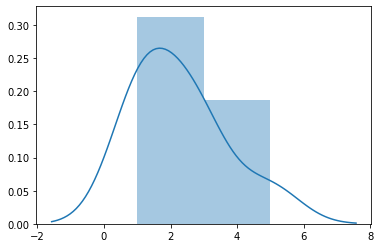

In [16]:
x=[1,1,1,2,2,3,3,5]
sns.distplot(x)

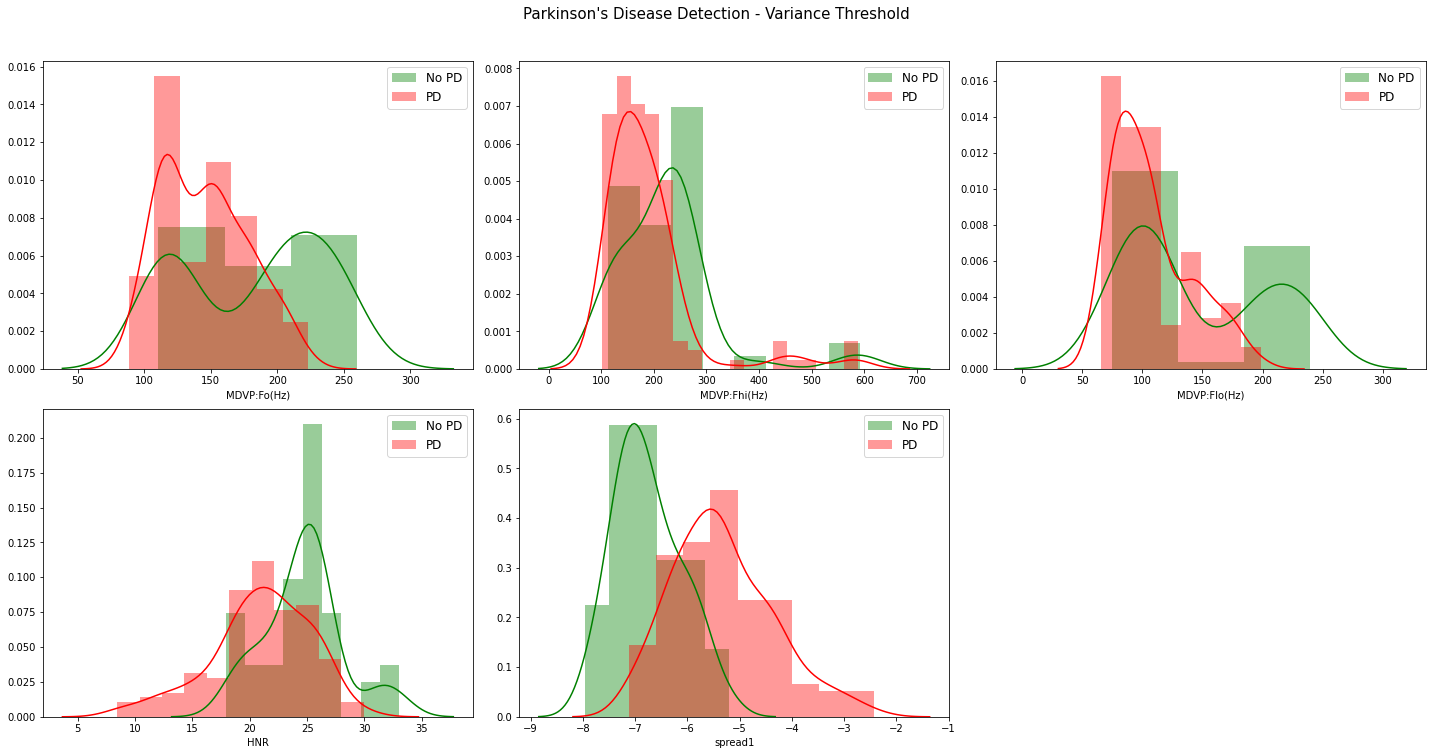

In [16]:
fig = plt.figure(figsize = (20, 25))
j = 0
for i in X.columns:
    plt.subplot(5.5,3.5, j+1)
    j += 1
    sns.distplot(data[i][data['status']==0], color='g', label = 'No PD')
    sns.distplot(data[i][data['status']==1], color='r', label = 'PD')
    plt.legend(loc='best', fontsize=12)
fig.suptitle("Parkinson's Disease Detection - Variance Threshold", fontsize=15)
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()